In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ccs = 15
css = 250

def cartesian_to_polar(row):
    x, y = tuple(row['loc'])
    radius = np.sqrt(x**2 + y**2)
    angle = np.degrees(np.arctan2(y, x))  # Convert radians to degrees
    return pd.Series([radius, angle], index=['radius', 'angle'])

def synth_seq(radius, angle, ccs, css):

    spiral = []
    for c_rad in range(ccs):
        spiral.append((angle + ((c_rad*css) - radius) / 10) % 360)

    return spiral

loc_data = [
    {'nm': 'great-wall-of-china', 'loc': [40.431907,116.570374]},
    {'nm': 'chichen-itza', 'loc': [20.683056, -88.568651]},
    {'nm': 'khaznah-petra-jordan', 'loc': [30.328611, 35.444167]},
    {'nm': 'machu-pichhu-peru', 'loc': [-13.163136, -72.544962]},
    {'nm': 'christ-the-redeemer-rio-de-janeeiro-brazil', 'loc': [-22.951916, -43.210487]},
    {'nm': 'Colosseum', 'loc': [41.890251, 12.492373]},
    {'nm': 'taj-mahal', 'loc': [27.175015, 78.042155]}
]

df = pd.DataFrame(loc_data)
df[['radius', 'angle']] = df.apply(cartesian_to_polar, axis=1)
df = df.sort_values(by='radius').reset_index()

df 

,index,nm,loc,radius,angle
0,5,Colosseum,"[41.890251, 12.492373]",43.713299,16.605460
1,2,khaznah-petra-jordan,"[30.328611, 35.444167]",46.648833,49.447294
2,4,christ-the-redeemer-rio-de-janeeiro-brazil,"[-22.951916, -43.210487]",48.927872,-117.975694
3,3,machu-pichhu-peru,"[-13.163136, -72.544962]",73.729503,-100.284312
4,6,taj-mahal,"[27.175015, 78.042155]",82.638123,70.801400
5,1,chichen-itza,"[20.683056, -88.568651]",90.951607,-76.855526
6,0,great-wall-of-china,"[40.431907, 116.570374]",123.383107,70.871128


In [26]:
factor = ccs / len(df)
factor

2.142857142857143

535.7142857142857
1071.4285714285713
1607.142857142857
2142.8571428571427
2678.5714285714284
3214.285714285714
3750.0


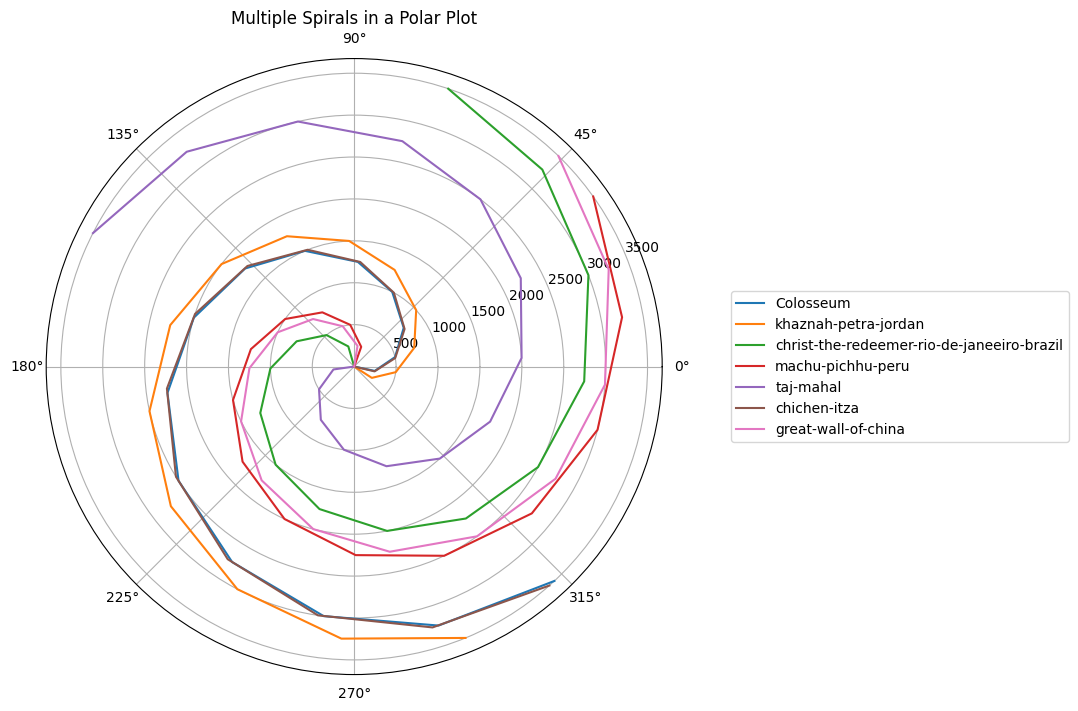

In [27]:
# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

fig.set_size_inches(12, 8)

for idx, row in df.iterrows():
    radius_equivalent = ((idx+1)*factor*css)
    print(radius_equivalent)
    angles = synth_seq(radius_equivalent, row['angle'], ccs, css)

    indices = np.arange(0, (ccs*css), css)
    angles_rad = np.radians(angles)

    ax.plot(angles_rad, indices, label=row['nm'])

ax.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))

# Formatting
ax.set_title("Multiple Spirals in a Polar Plot")
ax.grid(True)

# Show plot
plt.show()

In [31]:
ccs = 250
css = 20

import json
with open("countries.json", "r") as file:
    data = json.load(file)

# print(len(data))

loc_data = []
for country in data:
    loc_data.append({
        "nm": country['country'],
        "loc": [country['latitude'], country['longitude']]
    })

df = pd.DataFrame(loc_data)
df[['radius', 'angle']] = df.apply(cartesian_to_polar, axis=1)
df = df.sort_values(by='radius').reset_index()

df

,index,nm,loc,radius,angle
0,106,São Tomé and Príncipe,"[1.0, 7.0]",7.071068,81.869898
1,156,Togo,"[8.0, 1.16666666]",8.084622,8.297145
2,237,Ghana,"[8.0, -2.0]",8.246211,-14.036243
3,9,Ivory Coast,"[8.0, -5.0]",9.433981,-32.005383
4,12,Benin,"[9.5, 2.25]",9.762812,13.324531
...,...,...,...,...,...
245,235,Tonga,"[-20.0, -175.0]",176.139150,-96.519802
246,6,Wallis and Futuna,"[-13.3, -176.2]",176.701245,-94.316638
247,134,Tuvalu,"[-8.0, 178.0]",178.179685,92.573359
248,247,New Zealand,"[-41.0, 174.0]",178.765209,103.258872


In [32]:
factor = ccs / len(df)
factor

1.0

20.0
40.0
60.0
80.0
100.0
120.0
140.0
160.0
180.0
200.0
220.0
240.0
260.0
280.0
300.0
320.0
340.0
360.0
380.0
400.0
420.0
440.0
460.0
480.0
500.0
520.0
540.0
560.0
580.0
600.0
620.0
640.0
660.0
680.0
700.0
720.0
740.0
760.0
780.0
800.0
820.0
840.0
860.0
880.0
900.0
920.0
940.0
960.0
980.0
1000.0
1020.0
1040.0
1060.0
1080.0
1100.0
1120.0
1140.0
1160.0
1180.0
1200.0
1220.0
1240.0
1260.0
1280.0
1300.0
1320.0
1340.0
1360.0
1380.0
1400.0
1420.0
1440.0
1460.0
1480.0
1500.0
1520.0
1540.0
1560.0
1580.0
1600.0
1620.0
1640.0
1660.0
1680.0
1700.0
1720.0
1740.0
1760.0
1780.0
1800.0
1820.0
1840.0
1860.0
1880.0
1900.0
1920.0
1940.0
1960.0
1980.0
2000.0
2020.0
2040.0
2060.0
2080.0
2100.0
2120.0
2140.0
2160.0
2180.0
2200.0
2220.0
2240.0
2260.0
2280.0
2300.0
2320.0
2340.0
2360.0
2380.0
2400.0
2420.0
2440.0
2460.0
2480.0
2500.0
2520.0
2540.0
2560.0
2580.0
2600.0
2620.0
2640.0
2660.0
2680.0
2700.0
2720.0
2740.0
2760.0
2780.0
2800.0
2820.0
2840.0
2860.0
2880.0
2900.0
2920.0
2940.0
2960.0
2980.0
3000.0
302

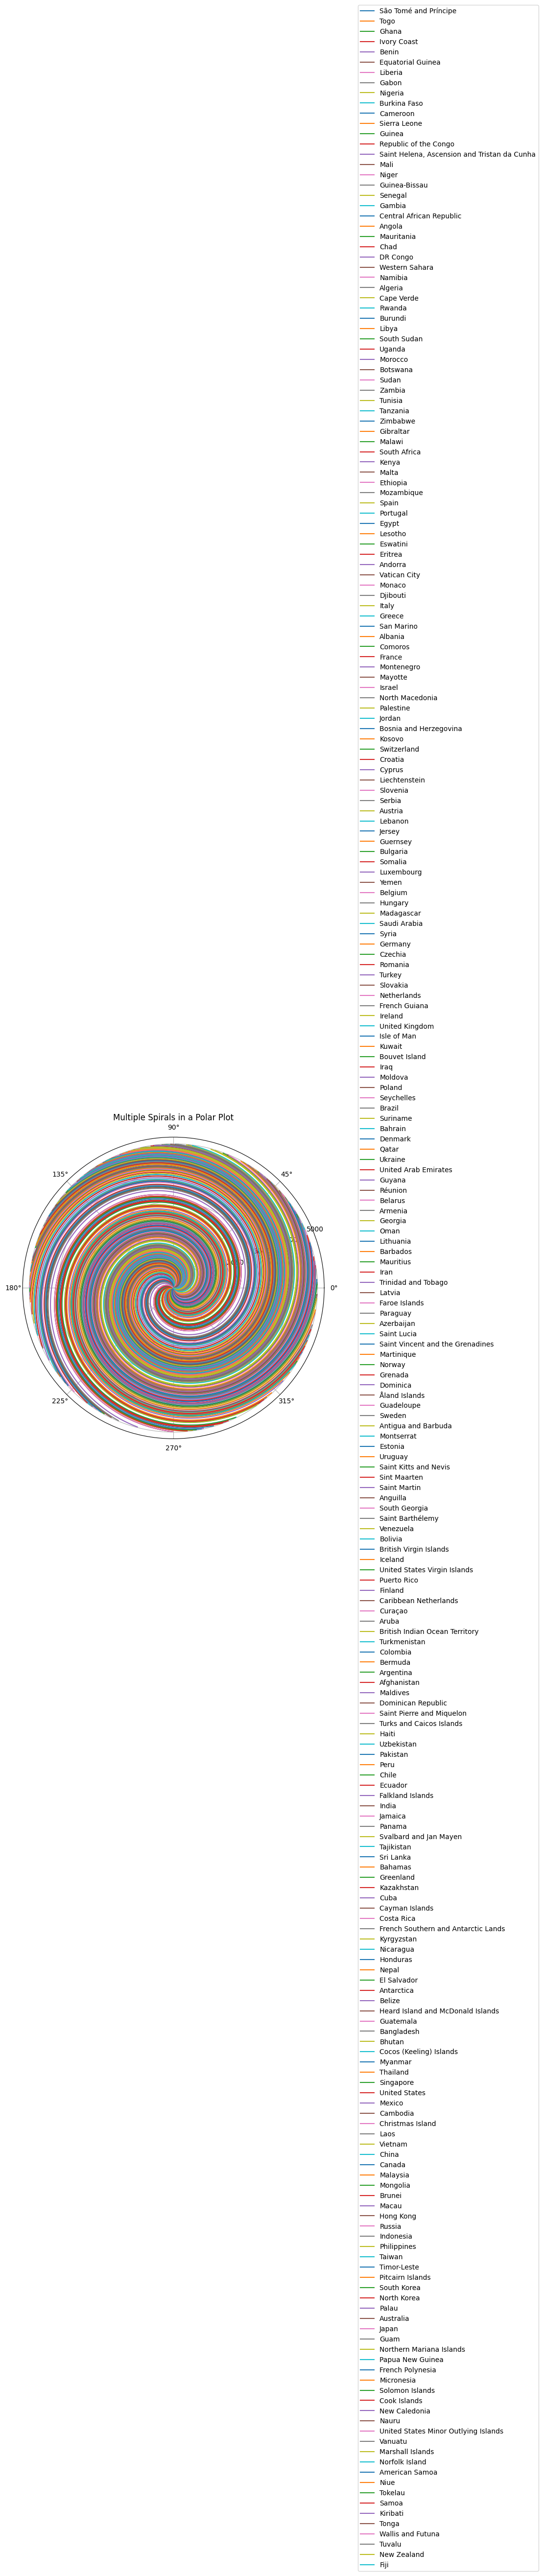

In [34]:
# Create polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

fig.set_size_inches(12, 8)

for idx, row in df.iterrows():
    radius_equivalent = ((idx+1)*factor*css)
    print(radius_equivalent)
    angles = synth_seq(radius_equivalent, row['angle'], ccs, css)

    indices = np.arange(0, (ccs*css), css)
    angles_rad = np.radians(angles)

    ax.plot(angles_rad, indices, label=row['nm'])

ax.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))

# Formatting
ax.set_title("Multiple Spirals in a Polar Plot")
ax.grid(True)

# Show plot
plt.show()